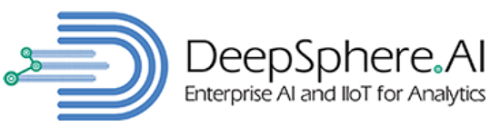

# ***Disclaimer***



DeepSphere.AI developed these materials based on its team’s expertise and technical infrastructure, and we are sharing these materials strictly for learning and research. These learning resources may not work on other learning infrastructures and DeepSphere.AI advises the learners to use these materials at their own risk. As needed, we will be changing these materials without any notification and we have full ownership and accountability to make any change to these materials.


#***Copyright Notice***


Local and international copyright laws protect this material. 
Repurposing or reproducing this material without written approval from DeepSphere.AI violates the law.
                    
                                        © DeepSphere.AI | Confidential and Proprietary


#***Lab 1: Classify a text as a positive, negative, or neutral sentiment with various NLP models***

1. Sentimental analysis Using NaiveBayesClassifier from Textblob API

In [1]:

import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
vAR_filepath = r'/content/drive/MyDrive/Introduction_to_Natural_Language_Processing/Unit9/IMDB_Dataset.csv'
# Read Input data
vAR_df=pd.read_csv(vAR_filepath)

Dataset source - https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [4]:
vAR_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
train = vAR_df[:1000]

In [6]:
import numpy as np
vAR_train = np.array(train)

In [7]:
# vAR_train

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
from textblob.classifiers import NaiveBayesClassifier

obj_cls = NaiveBayesClassifier(vAR_train)

In [10]:
vAR_pred = obj_cls.classify("The movie was boring")
print(vAR_pred)

negative


In [11]:
vAR_test = vAR_df[1000:1050]['review']


In [12]:
# vAR_test

In [13]:
vAR_test = np.array(vAR_test)

In [14]:
# vAR_test

In [15]:
vAR_pred_array = []
for i in vAR_test:
  vAR_pred = obj_cls.classify(i)
  vAR_pred_array.append(vAR_pred)

  

In [16]:
vAR_test_label = vAR_df[1000:1050]['sentiment']
vAR_test_label = np.array(vAR_test_label)

In [17]:
vAR_test_label 


array(['negative', 'negative', 'negative', 'positive', 'positive',
       'negative', 'negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive'],
      dtype=object)

In [18]:
vAR_pred_array

['negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative']

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
vAR_acc = accuracy_score(vAR_test_label, vAR_pred_array)
print("Accuracy using textblob is:",vAR_acc*100,"%")


Accuracy using textblob is: 76.0 %


2. Sentimental analysis using Textblog sentiment polarity

In [20]:
from textblob import TextBlob

vAR_polarity = TextBlob("It's a wonderful movie")


In [21]:
vAR_polarity

TextBlob("It's a wonderful movie")

In [22]:
print(vAR_polarity.sentiment.polarity)


1.0


In [23]:
vAR_tb=[]
for i in vAR_test:
  vAR_polarity = TextBlob(i)
  vAR_tb.append(vAR_polarity.sentiment.polarity)

  print("Review:",i, "Sentiment:",vAR_tb)

Review: This movie is awful, I can't even be bothered to write a review on this garbage! All i will say it is one of the most boring films I've ever seen.<br /><br />And the acting is very bad. The boy who plays the main character really annoys me, he's got the same expression on his face through out the movie. I just want to slap him! Basically 80% of the movie is slow motion shots of skateboarders, weird music, and utter sh*t..<br /><br />Apparently I've got to write at least 10 lines of text to submit this comment, so I'll use up a few more lines by saying the lead character has got one of those faces you just want to slap!<br /><br />Meh i give up..THIS MOVIE SUCKS !!!! Sentiment: [-0.23838368055555553]
Review: Why do movie makers always go against the author's work? I mean, yes, things have to be condensed for the sake of viewer interest, but look at Anne of Green Gables. They did a wonderful job of combining important events into a cohesive whole that was simply delightful. I can

In [24]:
print(vAR_tb)

[-0.23838368055555553, 0.2369208441840278, -0.15499999999999997, 0.145, 0.2152698412698413, 0.003645833333333348, -0.0569565217391304, 0.32581925243215565, 0.1653846153846154, 0.24991258741258746, 0.07840608465608466, 0.0973856209150327, -0.011262939958592124, -0.0053571428571428225, 0.033333333333333326, 0.33235544217687074, -0.004534632034632032, -0.022193700396825382, 0.09182616736014793, 0.09523809523809525, 0.003146258503401381, 0.15631152797819464, 0.10064102564102566, 0.01244623655913978, -0.04512310606060607, -0.14673295454545454, 0.057659313725490206, 0.3777777777777777, 0.14845238095238095, 0.08069838324940366, 0.014194139194139189, 0.03963793922127257, 0.05714285714285715, 0.12474747474747475, 0.19682539682539682, 0.046064814814814815, 0.3733333333333333, 0.465625, 0.3533110119047619, 0.14334608843537414, 0.04963636363636364, 0.2416143856143856, 0.17142857142857143, 0.03944805194805195, 0.04999999999999999, 0.2628192640692641, 0.5735714285714286, 0.09263157894736841, 0.23625

In [25]:
vAR_res = []
for i in vAR_tb:
  if i>=0:
    vAR_res.append('positive')
  else:
    vAR_res.append('negative')


In [26]:
vAR_res

['negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive']

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
vAR_acc = accuracy_score(vAR_test_label, vAR_res)
print("Accuracy using textblob is:",vAR_acc*100,"%")

Accuracy using textblob is: 70.0 %
